# Plot of sun with all observations

In [1]:
import sys
sys.path.append('D:/solar flares/data/2017-09-06')
import numpy as np
import matplotlib.pyplot as plt
import use_nessi as un
import use_nessi2 as un2

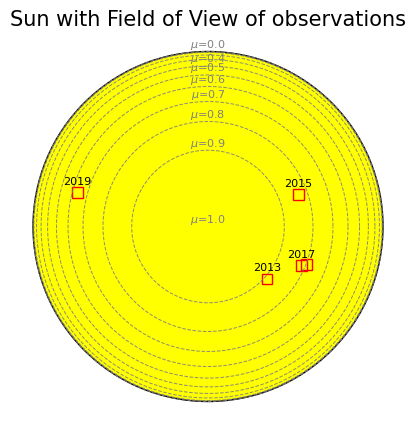

In [2]:
sr = solar_radius = 959.63
centers = [(513/sr, -216/sr) , (542/sr, -208/sr), (-716.9/sr, 186.2/sr) ,(323.4/sr, -287.9/sr), (496/sr, 175/sr),  ]
flarelabels = ["2017", "", "2019", "2013", "2015", "2017b", ]

# Create the sun plot
un2.create_sun_plot(centers, flarelabels)


\begin{table*}[ht]
    \centering
    \caption{Flare Information}
    \label{tab:flare_info} 
    \begin{tabular}{llllllllll}
        \toprule
        Year & NOAA & Class & Start/Stop/Peak & SST Start/Stop & Overlap & (X, Y) & $\mu$ & Lines & Cad [s] \\
        \midrule
        2017-09-06 &  12673 & X9.3 &11:53/12:10/12:01 &11:56/12:52 & appr 40\% & (513'', -216'') & 0.815 & \CaIR & 15.0 \\ & & & & & & & & \Halpha & 15.0  \\ & & & & & & & & \CaK & 6.6 \\
        
        2017-09-06 & 12673 & X2.2 & 08:57/09:17/09:09 &09:04/09:54 & appr 60\% & (542'', -208'') & 0.803 & \CaIR & 15.0 \\ & & & & & & & & \Halpha & 15.0 \\ & & & & & & & & \CaK & 6.6 \\ 
        
        2014-06-10 & 13052\footnote{To be noted SPoCA 13052} & X1.5& 12:36/12:52/13:03 &12:40/12:58&100\% & (-879'', -305'') & 0.139& \Halpha & 4.0\\     
        
        2015-09-27 & 12423 & M1.9 & 10:20/10:40/10:46 &10:35/10:59 & appr 40\% & (775'', -233'') & 0.502 & \CaIR & todo \\ & & & & & & & & \Halpha & todo \\
        
        2014-09-06& 12157 & M1.1 & 16:50/17:22/17:09 & 15:27/17:27 & todo & (-732'', -302'') & 0.560 & \Halpha & 11.6\\
        & & & & & & & & \CaIR & 11.6  \\
        & & & & & & & & \Fe{6302}\footnote{This observation has no spectral data so we exclude it from further investigation.} & 11.6  \\
        
        2015-06-24 &  12371 & C5.6&	15:12/15:40/15:29 &14:49/16:45 &  appr 100\% & (496'', 175'') & todo  & \CaIR & todo \\ & & & & & & & & \Halpha & todo  \\

        2017-09-10 & 12673 & ?& 15:53/16:32/18:43 & 16:26/16:29 & appr 50\% & (959'', -144'') & 0 & \CaK & 19.7\\  & & & &  16:25/17:49 & & & & \Hbeta  & 21.5\\  & & & & to do  & & & & \CaIR  & todo\\  
        

        
        2011-08-06 &  	11267 & C4.1 &08:37/08:51/08:47 &09:00/09:37 & appr 50\% & ( -359'',  -359'') & 0.848 & \Fe{6302} & 28.3 \\ & & & & & & & & \Fe{5576}  & 28.3\\
        
        2019-05-06 &12740 & C2.0  &08:41/08:51/08:47 &08:34/09:33& appr 70\%&(-716.9'', 186.2'')& 0.638 & \Fe{6173} & 20.9 \\ & & & & & & & & \CaIR  & 20.9\\ & & & & & & & & \CaK & 7.8 \\ 
        2013-06-30 & 11778 & C1.3 &09:11/09:27/09:18 &09:16/10:17&100\%&(323.4'', -287.9'')& 0.892 & \Halpha        & 7.3  \\
        \bottomrule
    \end{tabular}
\end{table*}